<a href="https://colab.research.google.com/github/DinurakshanRavichandran/Visio-Glance/blob/FINAL-MODEL-NLP/unified_eye_disease_detection_corrected.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unified Eye Disease Detection Model
This notebook implements a machine learning pipeline to predict one of six eye diseases based on symptom datasets.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


01) Concatenating the 6 datasets.

In [2]:
import pandas as pd

# Load all datasets (assuming they are stored as CSV files in a folder)
datasets = {
              "/content/drive/MyDrive/PROJECT 29/FINAL MODEL/preprocessed_glaucoma_dataset.csv" : "Glaucoma",
              "/content/drive/MyDrive/PROJECT 29/FINAL MODEL/Preprocessed_Cataract_Dataset.csv" : "Cataract",
              "/content/drive/MyDrive/PROJECT 29/FINAL MODEL/Preprocessed_Diabetic_Retinopathy_Dataset.csv" : "Diabetic Retinopathy",
              "/content/drive/MyDrive/PROJECT 29/FINAL MODEL/Preprocessed_CNV_Detection_Dataset.csv" : "CNV",
              "/content/drive/MyDrive/PROJECT 29/FINAL MODEL/Preprocessed_DME_Dataset.csv" : "DME",
              "/content/drive/MyDrive/PROJECT 29/FINAL MODEL/Preprocessed_Drusen_Dataset.csv" : "Drusen"
}

# Load and label each dataset
dataframes = []
for file, disease in datasets.items():
    df = pd.read_csv(file)  # Load dataset
    df["Disease_Label"] = disease  # Add disease label
    dataframes.append(df)

# Concatenate all datasets
merged_df = pd.concat(dataframes, ignore_index=True)

# Fill missing values with zero
merged_df.fillna(0, inplace=True)

# Save the merged dataset
merged_df.to_csv("/content/drive/MyDrive/PROJECT 29/FINAL MODEL/merged_dataset.csv", index=False)

# Display dataset shape and preview
print(f"Final dataset shape: {merged_df.shape}")
print(merged_df.head())


Final dataset shape: (73624, 112)
   Age  Intraocular Pressure (IOP)  Cup-to-Disc Ratio (CDR)  Pachymetry  \
0   69                       19.46                     0.42      541.51   
1   69                       18.39                     0.72      552.77   
2   67                       23.65                     0.72      573.65   
3   23                       18.04                     0.61      590.67   
4   21                       15.87                     0.30      588.41   

   Diagnosis  Visual Symptom_vomiting  Visual Symptom_nausea  \
0          1                      0.0                    1.0   
1          1                      0.0                    0.0   
2          1                      0.0                    0.0   
3          1                      0.0                    1.0   
4          1                      0.0                    0.0   

   Visual Symptom_eye pain  Visual Symptom_vision loss  \
0                      1.0                         0.0   
1             

02) Multi-Class Classification (Detect Specific Disease)

In [3]:
from sklearn.preprocessing import LabelEncoder

# Encode Disease_Label into numerical values (0-5)
label_encoder = LabelEncoder()
merged_df["Diagnosis"] = label_encoder.fit_transform(merged_df["Disease_Label"])

# Drop the original text label column
merged_df.drop(columns=["Disease_Label"], inplace=True)

# Save the updated dataset
merged_df.to_csv("/content/drive/MyDrive/PROJECT 29/FINAL MODEL/merged_multi_class_classification.csv", index=False)

# Print class mapping
print("Class Mapping:", dict(enumerate(label_encoder.classes_)))
print("Multi-class classification dataset prepared!")

Class Mapping: {0: 'CNV', 1: 'Cataract', 2: 'DME', 3: 'Diabetic Retinopathy', 4: 'Drusen', 5: 'Glaucoma'}
Multi-class classification dataset prepared!


Step 01: Load and Prepare the Dataset.

In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the merged dataset
df = pd.read_csv("/content/drive/MyDrive/PROJECT 29/FINAL MODEL/merged_dataset.csv")

# Encode the Disease_Label for multi-class classification
label_encoder = LabelEncoder()
df["Diagnosis"] = label_encoder.fit_transform(df["Disease_Label"])

# Drop the original text label column
df.drop(columns=["Disease_Label"], inplace=True)

# Split features and target
X = df.drop(columns=["Diagnosis"])  # Features
y = df["Diagnosis"]  # Target variable

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Dataset prepared! Shape:", df.shape)
print("Class Mapping:", dict(enumerate(label_encoder.classes_)))


<ipython-input-4-5c3ffac6d96c>:8: DtypeWarning: Columns (18,19,20,21,94,95,96,97,98,99,100,104,105,106,107,108,109,110,111) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/PROJECT 29/FINAL MODEL/merged_dataset.csv")


Dataset prepared! Shape: (73624, 111)
Class Mapping: {0: 'CNV', 1: 'Cataract', 2: 'DME', 3: 'Diabetic Retinopathy', 4: 'Drusen', 5: 'Glaucoma'}


 Converting Categorical Columns to Numeric Format.

In [5]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/PROJECT 29/FINAL MODEL/merged_dataset.csv")

# Identify categorical columns (non-numeric)
categorical_cols = df.select_dtypes(include=["object"]).columns

# Apply one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)  # Drop first to avoid multicollinearity

# Save the updated dataset
df.to_csv("/content/drive/MyDrive/PROJECT 29/FINAL MODEL/merged_dataset_encoded.csv", index=False)

print("Categorical columns converted! Shape:", df.shape)


<ipython-input-5-0013f7d94314>:4: DtypeWarning: Columns (18,19,20,21,94,95,96,97,98,99,100,104,105,106,107,108,109,110,111) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/PROJECT 29/FINAL MODEL/merged_dataset.csv")


Categorical columns converted! Shape: (73624, 173)


Step 02: Loading the Encoded Dataset and Preparing for Training.

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the encoded dataset
df = pd.read_csv("/content/drive/MyDrive/PROJECT 29/FINAL MODEL/merged_dataset_encoded.csv")

# Separate features and target variable
X = df.drop(columns=["Diagnosis"])  # Features
y = df["Diagnosis"]  # Target variable

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data split completed! Train shape:", X_train.shape, "Test shape:", X_test.shape)


Data split completed! Train shape: (58899, 172) Test shape: (14725, 172)


Step 03: Training an XGBoost Model and initializing Optuna tunning function.


In [10]:
!pip install optuna

import optuna
print("Optuna installed successfully!")

# Define the Optuna tuning function
def objective(trial):
    params = {
        'learning_rate': trial.suggest_float("learning_rate", 0.01, 0.3, step=0.01),
        'n_estimators': trial.suggest_int("n_estimators", 100, 1000, step=100),
        'max_depth': trial.suggest_int("max_depth", 3, 12),
        'subsample': trial.suggest_float("subsample", 0.5, 1.0),
        'colsample_bytree': trial.suggest_float("colsample_bytree", 0.5, 1.0),
        'gamma': trial.suggest_float("gamma", 0, 0.5, step=0.1),
        'min_child_weight': trial.suggest_int("min_child_weight", 1, 10),
        'reg_lambda': trial.suggest_float("reg_lambda", 1e-3, 10.0, log=True)  # L2 regularization
    }

    model = XGBClassifier(
        objective="multi:softmax",
        num_class=len(y.unique()),
        eval_metric="mlogloss",
        use_label_encoder=False,
        random_state=42,
        **params
    )

    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    return accuracy

# Run Optuna optimization
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)  # Adjust n_trials based on computing power

# Get the best hyperparameters
best_params = study.best_params
print("Best Hyperparameters:", best_params)

# Train the final XGBoost model using the best hyperparameters
best_model = XGBClassifier(
    objective="multi:softmax",
    num_class=len(y.unique()),
    eval_metric="mlogloss",
    use_label_encoder=False,
    random_state=42,
    **best_params
)

best_model.fit(X_train, y_train)
print("XGBoost Model Trained with Best Hyperparameters!")


[I 2025-03-02 06:17:23,353] A new study created in memory with name: no-name-1561f0a3-29b8-4876-a732-8db8518e47c8


Optuna installed successfully!


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:17:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-02 06:17:28,843] Trial 0 finished with value: 0.8241086587436333 and parameters: {'learning_rate': 0.19, 'n_estimators': 100, 'max_depth': 11, 'subsample': 0.9837334522538834, 'colsample_bytree': 0.5938132856272345, 'gamma': 0.1, 'min_child_weight': 7, 'reg_lambda': 0.6030343960157046}. Best is trial 0 with value: 0.8241086587436333.
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:17:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-02 06:17:44,838] Trial 1 finished with value: 0.8252631578947368 and parameters: {'learning_rate': 0.09999999999999999, 'n_estimators': 600, 'max_depth': 4, 'subsample': 0.6480269355775063, 'colsample_bytree': 0.885525

Best Hyperparameters: {'learning_rate': 0.09999999999999999, 'n_estimators': 400, 'max_depth': 8, 'subsample': 0.694695045677194, 'colsample_bytree': 0.8389288695678168, 'gamma': 0.0, 'min_child_weight': 9, 'reg_lambda': 0.0611394798563129}


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:30:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model Trained with Best Hyperparameters!


Step 04: Evaluation of the Model.

In [12]:
# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred) * 100 #convert to percentage.
print(f"Model Accuracy: {accuracy:.2f}%") #display with 2 decimal places.
print("Classification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 82.89%
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84      7442
           1       0.86      0.78      0.82      7283

    accuracy                           0.83     14725
   macro avg       0.83      0.83      0.83     14725
weighted avg       0.83      0.83      0.83     14725



Step 05: Feature Importance Visualization

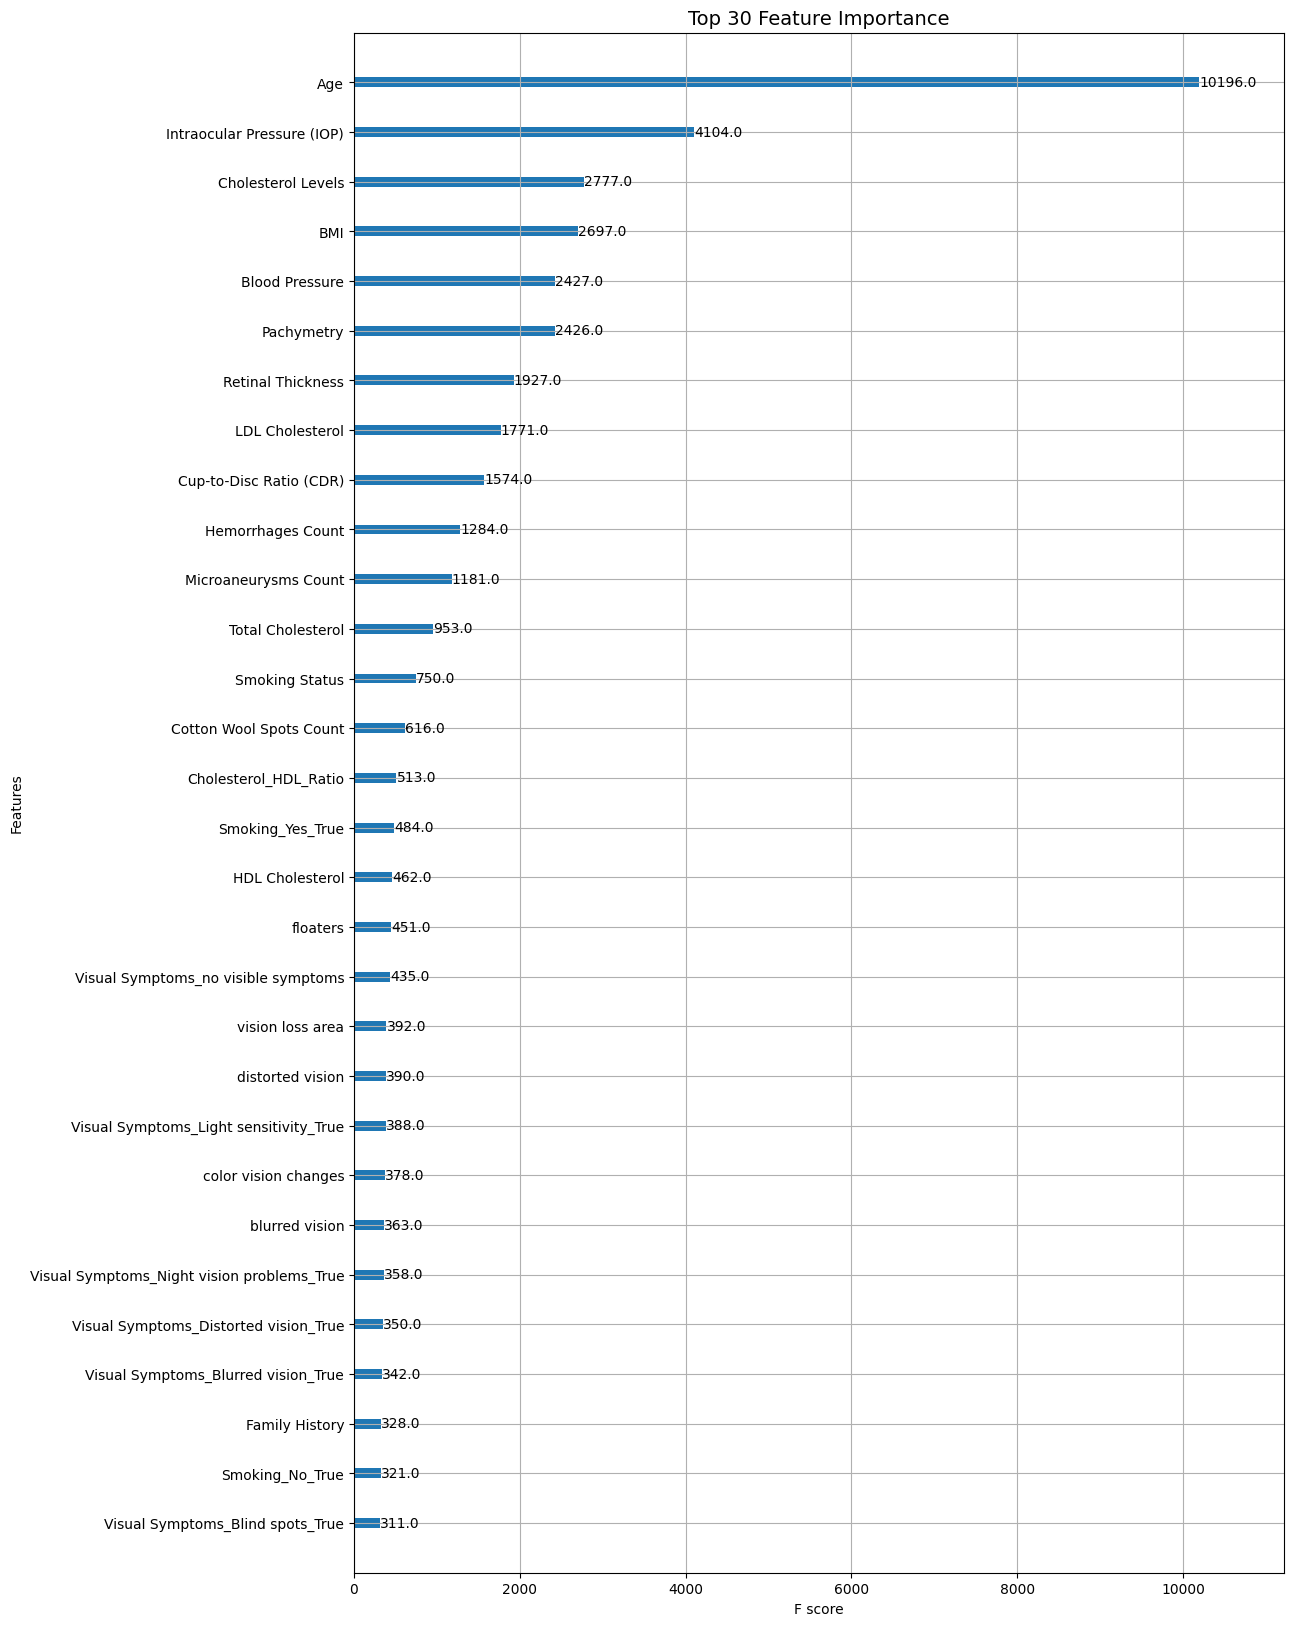

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from xgboost import plot_importance

# Set figure size and sort features by importance
fig, ax = plt.subplots(figsize=(12, 20))  # Increased height for better readability
plot_importance(best_model, ax=ax, max_num_features=30)  # Show only the top 30 features
plt.title("Top 30 Feature Importance", fontsize=14)
plt.show()

  Saving the model as a H5 file.

In [10]:
#Save the model as .h5 file
model.save_model("/content/drive/MyDrive/PROJECT 29/FINAL MODEL/xgboost_model_V1.h5")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:48:06] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
